# ML Technique - SVM

Sources: https://github.com/cmadusankahw/email-spam-detection-with-SVM

https://www.kaggle.com/code/elnahas/phishing-email-detection-using-svm-rfc

### Technique Summary: 
1. We loaded the email dataset.
2. We removed rows with empty body text, and ensured the body text was treated as strings. 
3. We then used TF-IDF to convert the body text into numerical values that represent the importance of words. 
4. The dataset was split into training and testing sets, with 80% used to train an SVM classifier to identify phishing emails. 
5. Finally, we evaluated the model's performance on the test set using accuracy, confusion matrix, and classification report to assess its effectiveness in detecting phishing emails.

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Load the Dataset

In [3]:
import pandas as pd

# Load the dataset
# data_path = '../masterData.csv'
data_path = '../Code/masterDataset.csv'
master_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
master_data.head()

,Subject,Body,label,Body_Length
0,good day,greetings i am sorry to encroach into your pri...,1,517
1,rescheduled dates for pros 9th annual pricing ...,world events and resulting airlineindustry act...,0,805
2,re graph2,please find attached the q1 q2 q3 and q4 nymex...,0,109
3,transaction completed,hello advisinguvicca paypal 25feb2022 063703 a...,1,1433
4,2022 employee benefits plan,the employee benefits program will now be supp...,1,1267


In [4]:
master_data.count()

Subject        7413
Body           7694
label          7713
Body_Length    7713
dtype: int64

In [5]:
# Check for missing values
missing_values = master_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Subject        300
Body            19
label            0
Body_Length      0
dtype: int64


In [6]:
# Handle missing values
# Remove rows with empty 'Body'
master_data = master_data.dropna(subset=['Body'])

# Replace missing values in 'Subject' with a space
master_data['Subject'].fillna(' ', inplace=True)

# Fill missing values in 'Body_Length' with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
master_data['Body_Length'] = imputer.fit_transform(master_data[['Body_Length']])

# TF-IDF (Term Frequency-Inverse Document Frequency) 
is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (called the corpus). It's commonly used in text mining and information retrieval.

* Term Frequency (TF): Measures how frequently a term appears in a document. For example, if the word "phishing" appears 3 times in a 100-word email, the TF for "phishing" is 3/100 = 0.03.
* Inverse Document Frequency (IDF): Measures how important a term is across all documents. Rare terms across documents have higher IDF values. For example, if "phishing" appears in 10 out of 1000 emails, the IDF for "phishing" is log(1000/10).

### WHY TF-IDF?
* Captures Importance: TF-IDF helps identify important words in an email by balancing the frequency of words in a single email (TF) with how common those words are across all emails (IDF).
* Numerical Representation: Machine learning models require numerical input. TF-IDF converts text data into numerical vectors that the models can understand and learn from.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Vectorize the 'Body' text data using TF-IDF
# We use TF-IDF to convert the text data in the Body column into numerical vectors. 
# Each email body is transformed into a list of numbers representing the importance of each word in that email.

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(master_data['Body'])
y = master_data['label']

# Training the SVM model
We train the SVM model using the numerical TF-IDF vectors. The model learns patterns and associations between the text (represented as numbers) and the labels (phishing or not phishing).

In [8]:
# Split the data into training (80%) and testing (20%) sets
# This helps in evaluating the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the SVM classifier
svm_classifier = SVC()

In [10]:
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

## Evaluate the Model:

Test the model on the testing set to see how well it can predict whether an email is phishing based on the learned patterns.

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.96816114359974
Confusion Matrix:
 [[1010   10]
 [  39  480]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1020
           1       0.98      0.92      0.95       519

    accuracy                           0.97      1539
   macro avg       0.97      0.96      0.96      1539
weighted avg       0.97      0.97      0.97      1539



# Visualizations

## Word Clouds
Display the most common words in phishing and non-phishing emails.
    We use WordCloud

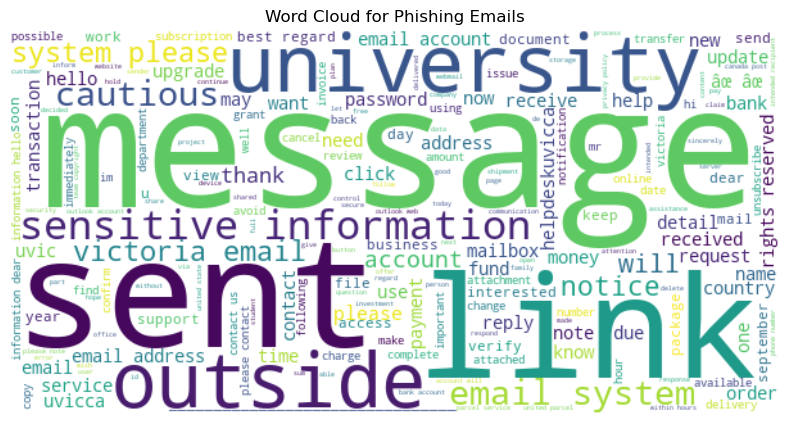

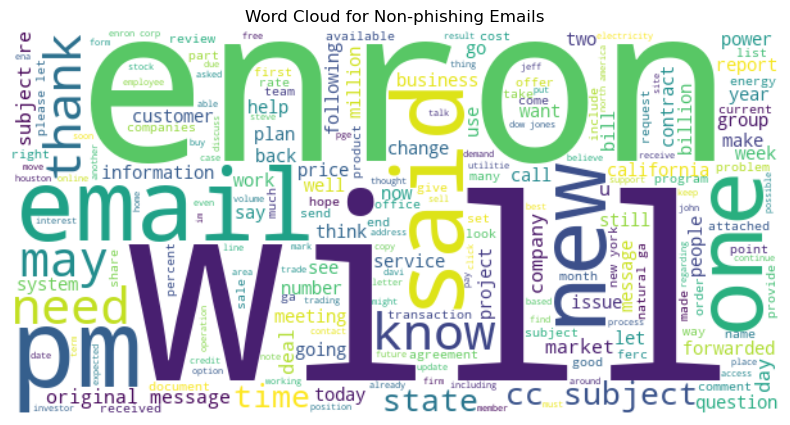

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for phishing and non-phishing emails
# Combine text data into a single string.
# combining all email bodies for phishing and non-phishing emails separately:
phishing_text = ' '.join(master_data[master_data['label'] == 1]['Body'])
non_phishing_text = ' '.join(master_data[master_data['label'] == 0]['Body'])

# Word cloud for phishing emails
# Create a WordCloud object and generate the word cloud using the generate method:

wordcloud_phishing = WordCloud(width=500, height=200, background_color='white').generate(phishing_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_phishing, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Phishing Emails')
plt.show()

# Word cloud for non-phishing emails
wordcloud_non_phishing = WordCloud(width=500, height=200, background_color='white').generate(non_phishing_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_phishing, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-phishing Emails')
plt.show()


Phishing Emails:

Common words: "message," "link," "sent," "account," "university," "outside," "victoria," "system," "please," "email."
Interpretation: Phishing emails often use terms related to actions like "click" or "link," and institutional names to appear legitimate. Words like "account" and "system" suggest attempts to trick recipients into thinking the email is from a trusted source.

Non-Phishing Emails:

Common words: "enron," "will," "email," "new," "thank," "need," "may," "pm," "one," "cc."
Interpretation: Non-phishing emails often contain more conversational words and typical business communication terms. The frequent occurrence of "enron" suggests that many emails might be related to business discussions or historical data.

## Confusion Matrix
Understand the performance of the model by visualizing true positives, false positives, true negatives, and false negatives.

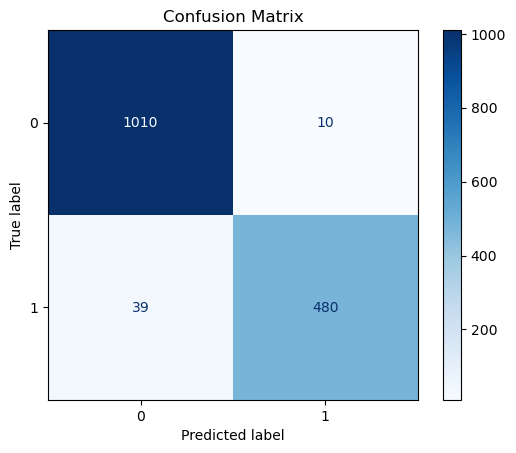

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## ROC Curve and AUC Score

Evaluate the model's ability to distinguish between classes.

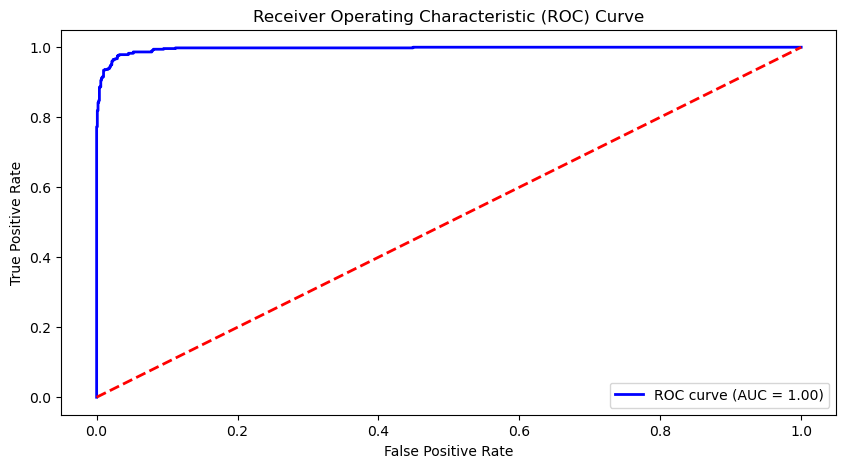

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the ROC curve and AUC score
y_proba = svm_classifier.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The ROC curve and AUC score of 1.00 suggest that the SVM classifier is extremely effective at distinguishing between phishing and non-phishing emails. The model exhibits high true positive rates and low false positive rates, making it highly reliable in predicting phishing emails with minimal errors.

# Model Optimization and Validation

Apply techniques to optimize ML models to handle imbalanced data, which is common in phishing detection. Use validation strategies, including cross-validation and employing a hold-out test set specifically designed to evaluate email classification.

## Validate with Cross-Validation

including cross-validation and employing a hold-out test set specifically designed to evaluate email classification.



In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.9668616  0.97270955 0.96556205 0.96751137 0.97269181]
Mean accuracy: 0.9690672763882446
Standard deviation: 0.0030323535734410267


Next steps: -> Use Pipeline: Create a pipeline that includes both the TF-IDF vectorizer and the SVM classifier.
Set Up Cross-Validation: Use StratifiedKFold for splitting the data.
Perform Cross-Validation: Use cross_val_score to evaluate the pipeline